<a href="https://www.kaggle.com/code/ibrahimawad02/dpp-ibrahim?scriptVersionId=140138272" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Preprocessing by **Ibrahim Hossam**

## Agenda
1. Read and analyze data.
2. find if there are missing values.
3. If there are many missing values less than 40% then we will fill the missing values then remove outliers, if the missing values not many then we will remove outliers first then fill the missing values.
4. see if there are unnecessary data to drop.
5. make categorical data numeric by label encounter. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing
import sklearn
from sklearn.impute import KNNImputer  # For filling missing values
from sklearn.preprocessing import MinMaxScaler # For scaling numeric data
from sklearn.preprocessing import LabelEncoder # For enumerating categorical data

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/melbourne-ds/MELBOURNE_HOUSE_PRICES.csv", sep = ',', encoding = 'utf-8')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [3]:
df.drop_duplicates()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [5]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [6]:
# The percentage of lost data in price column
print(f"The percentage of lost data in price is {df['Price'].isnull().sum()/df.shape[0]*100}%")

The percentage of lost data in price is 23.150278469765006%


- <span style = 'font-size:16px;'> The percentage of lost data is less than 40% so we can predict the lost data in several methods </span>
***

## Method 1:
- <span style = 'font-size:16px;'> We can start with primitve way where we fill the values with one value either mean if the data has no outliers or median if the data has outliers.</span>

<Axes: xlabel='Price', ylabel='Density'>

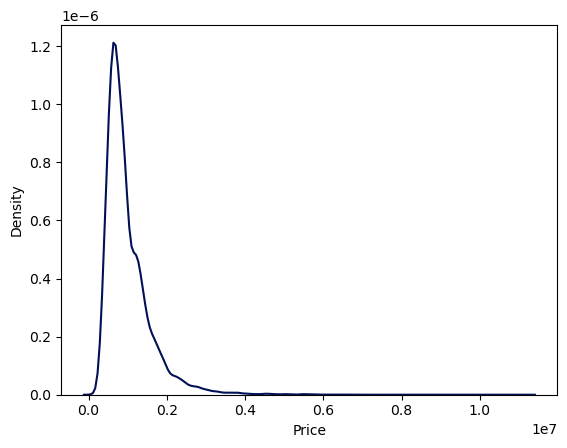

In [7]:
sns.kdeplot(data = df, x = "Price", color = '#001155')

<Axes: xlabel='Price'>

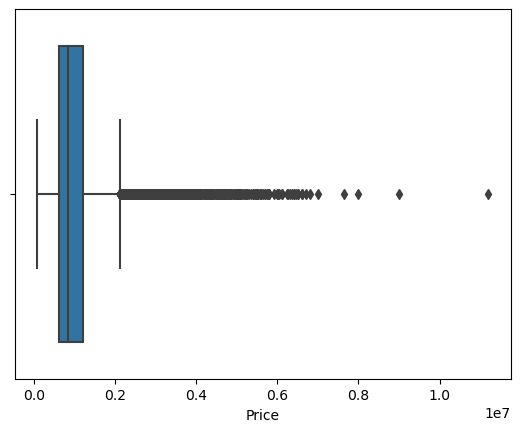

In [8]:
#Let's check if the price data has outliers
sns.boxplot(data = df, x = 'Price')

- <span style = 'font-size:16px;'> Since the data has outliers we will fill the values with median value.</span>

In [9]:
#We put the data on a copy so that the original data is not changed
df1 = df.copy()

In [10]:
df1["Price"].fillna(df1["Price"].median(), inplace = True)

<Axes: xlabel='Price', ylabel='Density'>

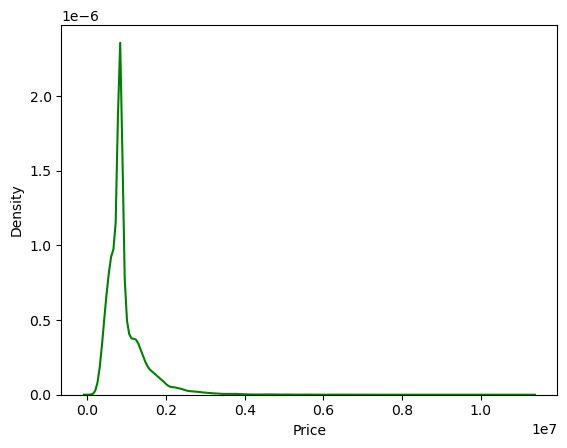

In [11]:
sns.kdeplot(data = df1, x = "Price", color = 'green')

***
## Method 2:
- <span style = 'font-size:16px;'> We can use another simple way which is Random Sample Replacement.</span>

In [12]:
#We put the data on a copy so that the original data is not changed
df2 = df.copy()
df2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [13]:
def random_sample_replacement(df):

  cols_with_missing_values = df.columns[df.isna().any()].tolist()

  for var in cols_with_missing_values:

      # extract a random sample
      random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),
                                                    random_state=0)
      # re-index the randomly extracted sample
      random_sample_df.index = df[
              df[var].isnull()].index

      # replace the NA
      df.loc[df[var].isnull(), var] = random_sample_df

  return df

- The previous code is used to fill the missing values with randomly chosen value from the same column

In [14]:
random_sample_replacement(df2)
df2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,830000.0,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


<Axes: xlabel='Price', ylabel='Density'>

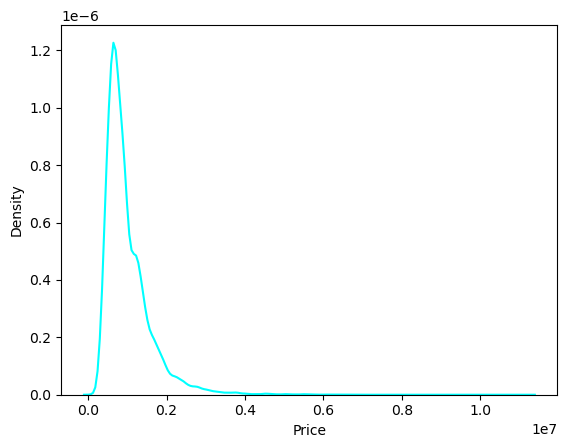

In [15]:
sns.kdeplot(data = df2, x = "Price", color = 'cyan')

### We can notice that the previous method maintained the shape of the data and the ratios with very little changes but still it is not very accurate
***

## Method3: 
- <span style = 'font-size:16px;'> Using Multiple Imputaion Chained Equations method (MICE) </span>

**Explanation:**<br>
This is how the algorithm operates:

1. Replace each variable's missing value with a straightforward imputation technique, such as mean imputation, which is also referred to as "placeholders."<br>
2. In a regression model where X1 is the dependent variable and the other variables are the independent variables, the "placeholders" for the first variable, X1, are regressed. <br>
3. The others are then employed as independent variables, with X2 acting as the dependent variable. The process keeps going until every variable has been taken into account at least once as the dependent variable.
4. These initial "placeholders" are subsequently swapped out for the regression model's predictions.
5. According to Raghunathan et al. 2002, the replacement procedure is performed for a certain number of cycles, which is typically 10, and the imputation is updated at each cycle.
- The prediction values that best capture the relationships found in the data are preferably used to replace the missing values at the end of the cycle.

In [16]:
#We put the data on a copy so that the original data is not changed
df3 = df.copy()
df3

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [17]:
pip install miceforest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
df3.describe(include = 'O')

,Suburb,Address,Type,Method,SellerG,Date,Regionname,CouncilArea
count,63023,63023,63023,63023,63023,63023,63023,63023
unique,380,57754,3,9,476,112,8,34
top,Reservoir,5 Charles St,h,S,Barry,24/03/2018,Southern Metropolitan,Boroondara City Council
freq,1241,7,45053,34063,6894,1144,17559,5132


In [19]:
#Changing the object columns into category type
df3[df3.select_dtypes(['object']).columns] = df3.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [20]:
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(
data = df3,
save_all_iterations = True,
random_state = 2024
)

/opt/conda/lib/python3.10/site-packages/miceforest/ImputationKernel.py:371: UserWarning: [Suburb,Address,Method,SellerG,Date,CouncilArea] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


In [21]:
mice_kernel.mice(2)
df3 = mice_kernel.complete_data()
df3.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
45437,Chelsea,1/67 Ella Gr,2,u,685000.0,S,hockingstuart/hockingstuart,23/09/2017,3196,South-Eastern Metropolitan,3906,27.0,Kingston City Council
52229,Ormond,712 North Rd,3,h,1401000.0,SP,Buxton,25/11/2017,3204,Southern Metropolitan,3578,11.4,Glen Eira City Council
20571,Carlton North,3/1044 Drummond St,3,t,1036000.0,S,Nicholson,11/08/2018,3054,Northern Metropolitan,3106,3.5,Melbourne City Council
41872,Collingwood,102/6 Mater St,2,u,500000.0,VB,Nelson,22/04/2017,3066,Northern Metropolitan,4553,2.0,Yarra City Council
21435,Point Cook,17 Copeland Cr,3,h,647000.0,S,Reliance,11/11/2017,3030,Western Metropolitan,15542,14.7,Wyndham City Council
60681,Rowville,80 Taylors La,3,h,782000.0,S,Harcourts,29/04/2017,3178,South-Eastern Metropolitan,11667,23.5,Knox City Council
44880,Doncaster East,1/33 Elizabeth St,3,u,920000.0,SN,Barry,23/06/2018,3109,Eastern Metropolitan,10999,14.3,Manningham City Council
55460,Tullamarine,28 Sharps Rd,3,h,946000.0,S,Barry,27/06/2016,3043,Western Metropolitan,3296,12.9,Brimbank City Council
62000,Maribyrnong,3/4 Navigator St,2,u,330000.0,S,Woodards,30/07/2016,3032,Western Metropolitan,4918,4.3,Maribyrnong City Council
59369,Croydon,1/4 Haig St,3,h,722000.0,S,Ray,28/10/2017,3136,Eastern Metropolitan,11925,23.0,Maroondah City Council


In [22]:
df3.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

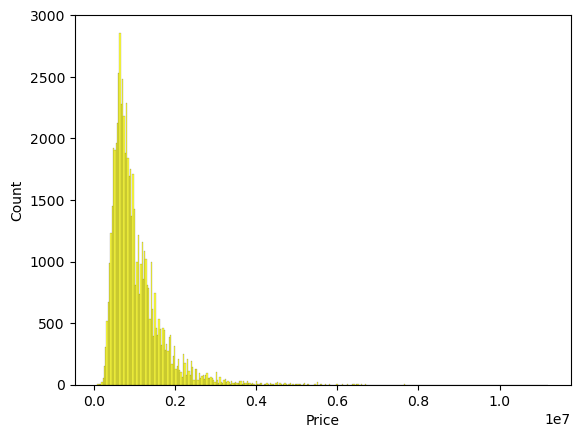

In [23]:
sns.histplot(data = df3, x = 'Price', color = 'yellow')

***
## Method4: 
- <span style = 'font-size:16px;'> In this technique, the missing values get imputed based on the KNN algorithm i.e. K-nearest-neighbour algorithm. </span>

In [24]:
df4 = df.copy()
df4.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
21022,Brighton East,33 Centre Rd,3,h,1750000.0,S,Buxton,11/11/2017,3187,Southern Metropolitan,6938,10.3,Bayside City Council
15646,Richmond,6/190 Lennox St,1,u,580000.0,S,Biggin,8/09/2018,3121,Northern Metropolitan,14949,2.4,Yarra City Council
52718,Epping,28 Halter Cr,3,h,581000.0,S,Love,26/05/2018,3076,Northern Metropolitan,10926,19.6,Whittlesea City Council
45749,North Melbourne,17 Shands La,2,t,NaN,PI,Alexkarbon,23/09/2017,3051,Northern Metropolitan,6821,1.8,Melbourne City Council
3831,Sunbury,1 Heysen Dr,3,h,410000.0,SP,Brad,3/06/2017,3429,Western Metropolitan,14092,31.7,Hume City Council


In [25]:
#Changing the object columns into category type
df4[df4.select_dtypes(['object']).columns] = df4.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [26]:
# Extract the 'Price' column for imputation
price_column = df4['Price'].values.reshape(-1, 1)

imputer = KNNImputer(n_neighbors=3)
price_imputed = imputer.fit_transform(price_column)

# Update the 'Price' column in the DataFrame with imputed values
df4['Price'] = price_imputed

In [27]:
df4.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

/tmp/ipykernel_20/1725527645.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df4['Price'], color = 'magenta')


<Axes: ylabel='Density'>

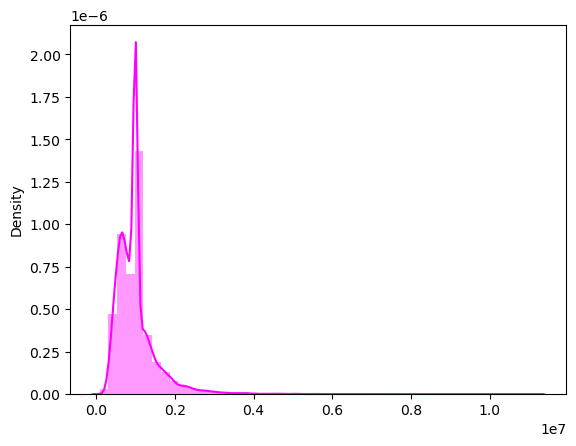

In [28]:
sns.distplot(x = df4['Price'], color = 'magenta')

***
# After filling the data we will remove the outliers

In [29]:
# First let's check the numeric columns
df4.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,6.302300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.202835e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.770000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,9.978982e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.065000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


<Axes: xlabel='Rooms'>

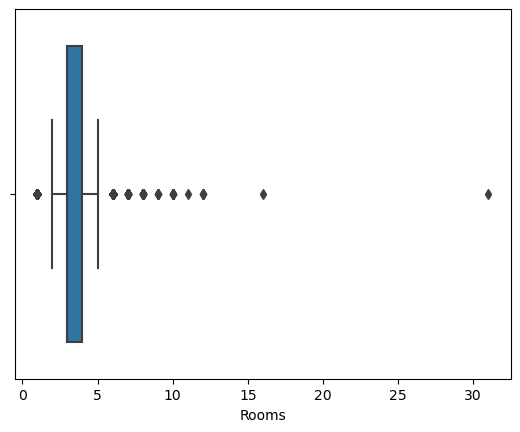

In [30]:
sns.boxplot(data = df4, x = 'Rooms' )

<Axes: xlabel='Rooms'>

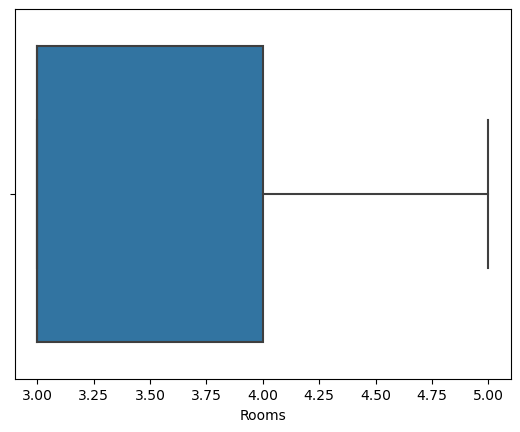

In [31]:
Room_l = 2  # Rooms lower boundary
Room_u = 6  # Rooms upper boundary

filtered_df = df4[~((df4['Rooms'] > Room_l) & (df4['Rooms'] < Room_u))]

df4.drop(filtered_df.index, inplace=True)

# Print the DataFrame without outlier rows
sns.boxplot(data = df4, x = 'Rooms')


***

<Axes: xlabel='Price'>

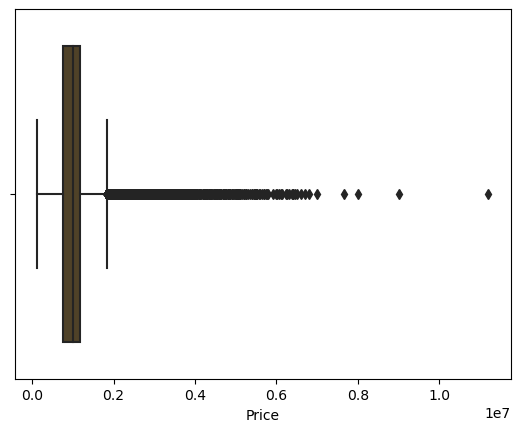

In [32]:
sns.boxplot(data = df4, x = 'Price', color = "#554422" )

<Axes: xlabel='Price'>

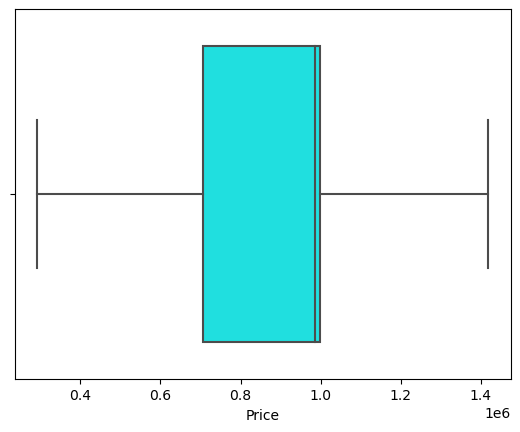

In [33]:
Price_l = 0.029*10**7  # Price lower boundary
Price_u = 0.142*10**7  # Price upper boundary

filtered_df = df4[~((df4['Price'] > Price_l) & (df4['Price'] < Price_u))]

df4.drop(filtered_df.index, inplace = True)

# Print the DataFrame without outlier rows
sns.boxplot(data = df4, x = 'Price', color = 'Cyan')

***

<Axes: xlabel='Propertycount'>

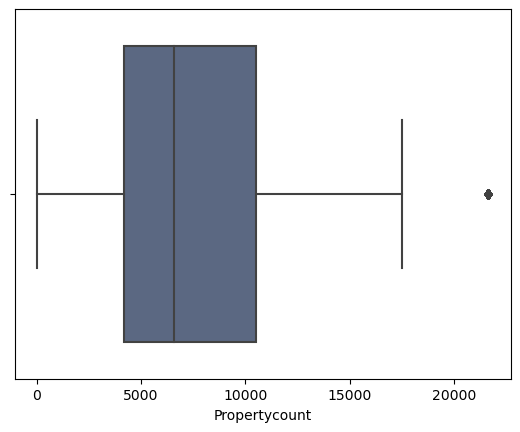

In [34]:
sns.boxplot(data = df4, x = 'Propertycount', color = "#556688" )

<Axes: xlabel='Propertycount'>

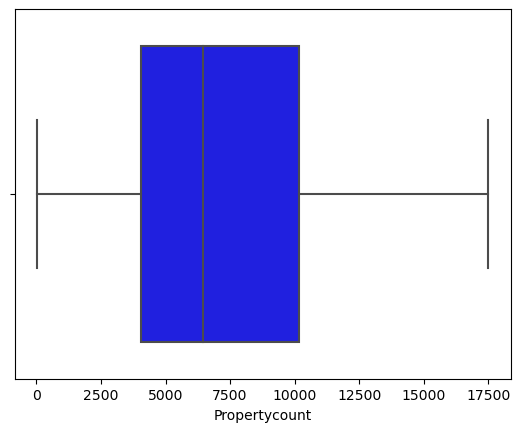

In [35]:
PC_u = 17550  # Property Count upper boundary

filtered_df = df4[(df4['Propertycount'] > PC_u)]

df4.drop(filtered_df.index, inplace = True)

# Print the DataFrame without outlier rows
sns.boxplot(data = df4, x = 'Propertycount', color = 'blue')

***

<Axes: xlabel='Distance'>

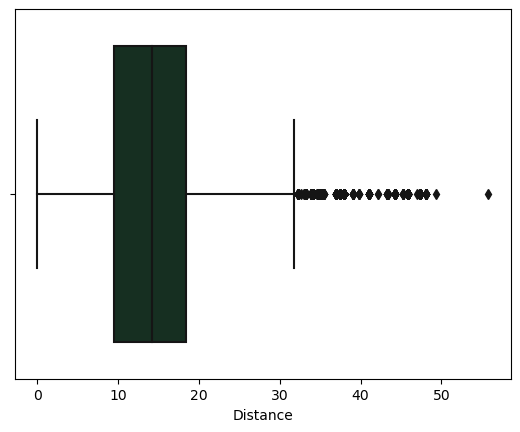

In [36]:
sns.boxplot(data = df4, x = 'Distance', color = "#123321" )

<Axes: xlabel='Distance'>

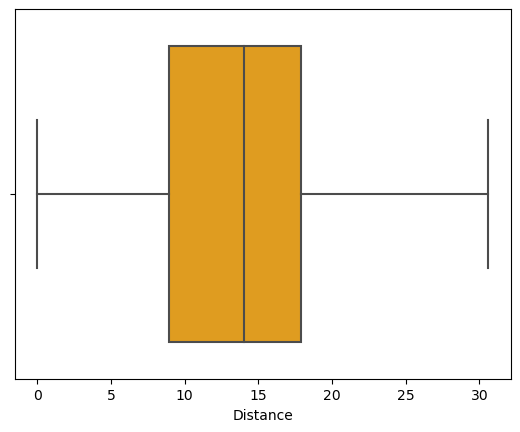

In [37]:
Distance_u = 31  # Property Count upper boundary

filtered_df = df4[(df4['Distance'] > Distance_u)]

df4.drop(filtered_df.index, inplace = True)

# Print the DataFrame without outlier rows
sns.boxplot(data = df4, x = 'Distance', color = 'orange')

# Before turning categorical data into numeric using label encounter we can drop the unnecessary columns first

In [38]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36981 entries, 1 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         36981 non-null  category
 1   Address        36981 non-null  category
 2   Rooms          36981 non-null  int64   
 3   Type           36981 non-null  category
 4   Price          36981 non-null  float64 
 5   Method         36981 non-null  category
 6   SellerG        36981 non-null  category
 7   Date           36981 non-null  category
 8   Postcode       36981 non-null  int64   
 9   Regionname     36981 non-null  category
 10  Propertycount  36981 non-null  int64   
 11  Distance       36981 non-null  float64 
 12  CouncilArea    36981 non-null  category
dtypes: category(8), float64(2), int64(3)
memory usage: 4.6 MB


In [39]:
df4.nunique()

Suburb             309
Address          34193
Rooms                3
Type                 3
Price             1929
Method               9
SellerG            395
Date               112
Postcode           183
Regionname           8
Propertycount      299
Distance           144
CouncilArea         28
dtype: int64

In [40]:
# We can drop postcode because its numbers are unnecessary and we can depend on suburb instead of Address
df4.drop("Postcode", axis = 1, inplace = True)
df4.drop("Address", axis = 1, inplace = True)

### Now we will standardize the numeric values and numerate the categorical columns

### Standardizing numerical columns

In [41]:
# Before standadizing
df4.describe()

,Rooms,Price,Propertycount,Distance
count,36981.000000,3.698100e+04,36981.000000,36981.000000
mean,3.431519,9.033561e+05,7127.732376,13.841911
std,0.601868,2.316701e+05,3943.940165,6.052844
min,3.000000,3.000000e+05,121.000000,0.000000
25%,3.000000,7.240000e+05,4048.000000,8.900000
50%,3.000000,9.978982e+05,6244.000000,14.000000
75%,4.000000,9.978982e+05,10175.000000,17.900000
max,5.000000,1.419000e+06,17496.000000,30.600000


In [42]:
# List of numerical columns to be standardized
numerical_columns = ['Rooms', 'Price', 'Propertycount', 'Distance']
scaler = MinMaxScaler()

df4[numerical_columns] = scaler.fit_transform(df4[numerical_columns])
df4.describe()

,Rooms,Price,Propertycount,Distance
count,36981.000000,36981.000000,36981.000000,36981.000000
mean,0.215759,0.539192,0.403265,0.452350
std,0.300934,0.207033,0.226989,0.197805
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.378910,0.226014,0.290850
50%,0.000000,0.623680,0.352403,0.457516
75%,0.500000,0.623680,0.578647,0.584967
max,1.000000,1.000000,1.000000,1.000000


### Label Encoding

In [43]:
#Before Encoding
df4.describe(include = ['object', 'category'])

,Suburb,Type,Method,SellerG,Date,Regionname,CouncilArea
count,36981,36981,36981,36981,36981,36981,36981
unique,309,3,9,395,112,8,28
top,Craigieburn,h,S,Barry,24/03/2018,Northern Metropolitan,Brimbank City Council
freq,738,30539,19695,5295,638,9784,2927


In [44]:
categorical_columns = ['Type', 'Method','Regionname']
# The rest of the columns have many unique values and will not affect me as a ML model
label_encoder = LabelEncoder()

for col in categorical_columns:
    df4[col] = label_encoder.fit_transform(df4[col])

df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36981 entries, 1 to 63022
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         36981 non-null  category
 1   Rooms          36981 non-null  float64 
 2   Type           36981 non-null  int64   
 3   Price          36981 non-null  float64 
 4   Method         36981 non-null  int64   
 5   SellerG        36981 non-null  category
 6   Date           36981 non-null  category
 7   Regionname     36981 non-null  int64   
 8   Propertycount  36981 non-null  float64 
 9   Distance       36981 non-null  float64 
 10  CouncilArea    36981 non-null  category
dtypes: category(4), float64(4), int64(3)
memory usage: 2.5 MB


In [45]:
# The final view of data 
df4.sample(15)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
54898,Ashwood,0.0,1,0.593387,2,Tim,27/06/2016,5,0.159597,0.333333,Monash City Council
30669,Coburg,0.0,1,0.518320,2,Brad,16/09/2017,2,0.637871,0.218954,Darebin City Council
24366,Yarraville,0.5,0,0.612601,2,Jas,13/05/2017,6,0.369612,0.205882,Maribyrnong City Council
37899,Hoppers Crossing,0.0,0,0.352994,2,Barry,19/05/2018,6,0.789007,0.601307,Wyndham City Council
29622,Balaclava,0.0,0,0.983021,5,McGrath,16/06/2018,5,0.162935,0.209150,Port Phillip City Council
54224,Bundoora,0.0,0,0.393208,2,Barry,27/05/2017,2,0.578647,0.395425,Banyule City Council
33891,Mooroolbark,0.5,0,0.313673,2,Ray,17/06/2017,1,0.469583,0.866013,Yarra Ranges Shire Council
19474,Fawkner,0.0,0,0.348525,0,hockingstuart,10/12/2016,2,0.284835,0.428105,Hume City Council
21446,Prahran,0.0,2,0.623680,5,Hodges,11/11/2017,5,0.437180,0.150327,Stonnington City Council
53460,Altona North,0.0,0,0.438785,2,Jas,26/08/2017,6,0.288403,0.307190,Hobsons Bay City Council


***
# Thanks for reading
# Yours ***Ibrahim Hossam***